# Usage Instructions - Time Series Ticket Forecasting

Mphasis time series ticket forecasting helps businesses predict the number of tickets of a specific type based on historic data. This will help businesses assess the level of automation as well as human intervention required to resolve the issues and plan accordingly. It uses ensemble ML algorithms with automatic model selection algorithms. This solution provides consistent and better results due to its ensemble learning approach. This solution performs automated model selection to apply the right model based on the input data.

## Contents

1. Prequisites
1. Data Dictionary
1. Import Libraries
1. Sample Input Data
1. Create Model
1. Create Future Data
1. Predict Future Datapoints
1. Plot the DataFrame
1. Saving Forcast

### Prerequisites

To run this algorithm you need to have install following packages:
- "pandas" to read/save csv files.
- "pystan==2.19.1.1"
- "prophet" to forcast data.



### Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model   will not perform as expected
1. Have an unique identifier column called 'maskedsku'. eg. 'maskedsku' can be shipmentid
2. The date format of the columns should be: 'YYYY-MM-DD'

## Import Libraries

In [1]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Sample input data

In [3]:
# read the sample csv
df = pd.read_csv("sample_ticket.csv",index_col = [0])
df =df.T.reset_index()
# naming is required as per prophet conditions.
df = df.rename(mapper = {'index':'ds','product_1':'y'},axis = 1)
df

maskedsku,ds,y
0,2018-08-01 12:00,13380.82192
1,2018-08-01 13:00,15244.93151
2,2018-08-01 14:00,14925.20548
3,2018-08-01 15:00,13585.97260
4,2018-08-01 16:00,11365.47945
5,2018-08-01 17:00,20060.54795
6,2018-08-01 18:00,12861.36986
7,2018-08-01 19:00,14945.22740
8,2018-08-01 20:00,14490.37808
9,2018-08-01 21:00,12208.53699


## Create Model

Now we use the Model Package to create a model

In [4]:

m = Prophet()
m.fit(df.iloc[:-1,:])

# Python


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Create the future data

The prophet instance used to create future data.

In [5]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
59,2018-08-28 21:00:00
60,2018-08-29 21:00:00
61,2018-08-30 21:00:00
62,2018-08-31 21:00:00
63,2018-09-01 21:00:00


# Predict Future datapoints

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2018-08-28 21:00:00,62466.095757,58729.356038,66582.048759
60,2018-08-29 21:00:00,64226.055983,60237.711807,67857.870246
61,2018-08-30 21:00:00,65986.016209,62062.669454,69894.192989
62,2018-08-31 21:00:00,67745.976435,63750.956274,71466.485773
63,2018-09-01 21:00:00,69505.936660,65838.247148,73430.413112


## Plot the forecast dataframe

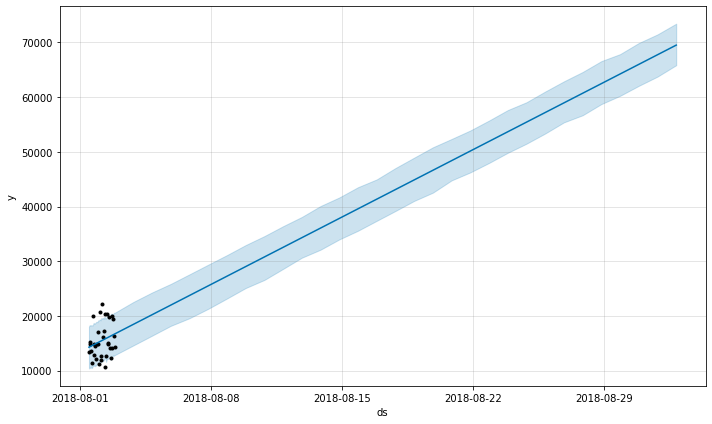

In [7]:
# Python
fig1 = m.plot(forecast)

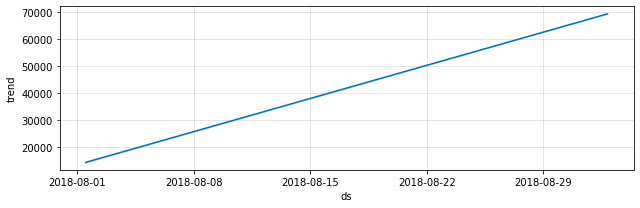

In [8]:
# Python
fig2 = m.plot_components(forecast)

## Saving Forecast

In [11]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.to_csv('result_ticket.csv',index=False)

In [10]:
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2018-08-01 12:00:00,14287.184576,10384.179499,18058.969675
1,2018-08-01 13:00:00,14360.516251,10605.401473,18335.265491
2,2018-08-01 14:00:00,14433.847927,10439.427930,18208.984364
3,2018-08-01 15:00:00,14507.179603,10763.239059,18329.531865
4,2018-08-01 16:00:00,14580.511278,10466.998091,18279.344598
...,...,...,...,...
59,2018-08-28 21:00:00,62466.095757,58729.356038,66582.048759
60,2018-08-29 21:00:00,64226.055983,60237.711807,67857.870246
61,2018-08-30 21:00:00,65986.016209,62062.669454,69894.192989
62,2018-08-31 21:00:00,67745.976435,63750.956274,71466.485773
